In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
Benefit_coast=pd.read_csv(r"C:\Users\hp\clean_benefits.csv",low_memory=False)

In [7]:
Benefit_coast

,BusinessYear,StateCode,BenefitName,IsCovered,PlanId,IssuerId
0,2014,AK,Routine Dental Services (Adult),covered,21989AK0010001-00,21989
1,2014,AK,Dental Check-Up for Children,covered,21989AK0010001-00,21989
2,2014,AK,Basic Dental Care - Child,covered,21989AK0010001-00,21989
3,2014,AK,Orthodontia - Child,covered,21989AK0010001-00,21989
4,2014,AK,Major Dental Care - Child,covered,21989AK0010001-00,21989
...,...,...,...,...,...,...
5048403,2016,WV,Major Dental Care - Child,covered,96480WV0110003-00,96480
5048404,2016,WV,Basic Dental Care - Adult,NaN,96480WV0110003-00,96480
5048405,2016,WV,Orthodontia - Adult,NaN,96480WV0110003-00,96480
5048406,2016,WV,Major Dental Care - Adult,NaN,96480WV0110003-00,96480


In [9]:
# lets start one by one 
Benefit_coast['BusinessYear'].value_counts() # How many records per year?

BusinessYear
2015    2079286
2016    1804253
2014    1164869
Name: count, dtype: int64

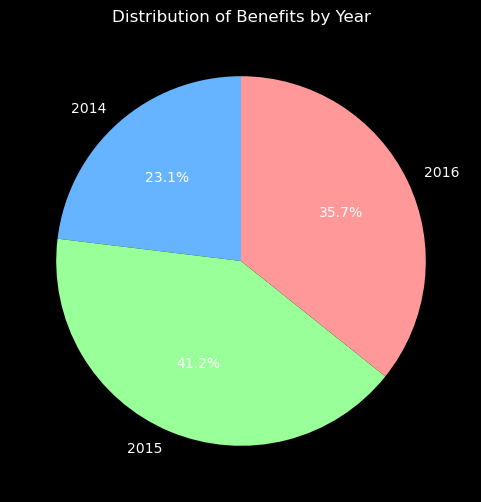

In [83]:
# Year-wise count
year_counts = Benefit_coast['BusinessYear'].value_counts().sort_index()
plt.figure(figsize=(4,4), facecolor='black') # bg change 
# Pie chart
year_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,figsize=(6,6),textprops={'color':'white'},colors=['#66b3ff','#99ff99','#ff9999'])  # optional colors)
plt.title("Distribution of Benefits by Year",color= 'white')
plt.ylabel("")  # remove y-axis label
plt.show()

In [11]:
# lets check state wise:
* Which state has most benefit entries?
* Any state missing?
Benefit_coast['StateCode'].value_counts()

Object `entries` not found.
Object `missing` not found.


StateCode
WI    512587
TX    465164
FL    364742
OH    331045
IL    320533
PA    260866
AZ    221612
GA    196579
MI    189225
IN    148531
VA    142236
TN    138154
OK    133639
SC    111907
IA    110221
UT     98421
MO     95152
NC     94290
OR     93502
LA     91816
NJ     86107
AR     68064
NE     66935
KS     64279
NV     62743
ME     61834
MT     58132
NM     56669
WY     48425
ND     48269
SD     47730
MS     46895
NH     44305
AK     41320
WV     32638
DE     31370
AL     28417
ID     27313
HI      6741
Name: count, dtype: int64

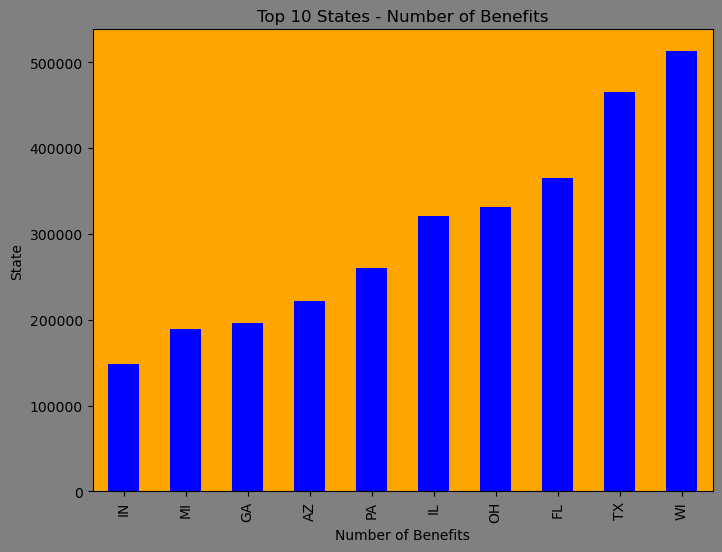

In [65]:
# Top 10 states for better readability
fig, ax = plt.subplots(facecolor='gray')  # figure bg
state_counts = Benefit_coast['StateCode'].value_counts().head(10)
ax.set_facecolor('orange')  # plot bg
# Horizontal bar chart
state_counts.sort_values().plot(kind='bar', color='blue',ax=ax,figsize=(8,6))
plt.title("Top 10 States - Number of Benefits")
plt.xlabel("Number of Benefits")
plt.ylabel("State")
plt.show()

In [27]:
# lets check the benefit wise 
Benefit_coast['BenefitName'].value_counts()

BenefitName
Orthodontia - Adult                   77377
Routine Dental Services (Adult)       77353
Basic Dental Care - Adult             77353
Accidental Dental                     77353
Major Dental Care - Adult             77353
                                      ...  
Posterior Composites - Child              1
Implant Adult                             1
Prefab Resin Crown                        1
Vital pulpotomy                           1
root Canal Therapy and Retreatment        1
Name: count, Length: 861, dtype: int64

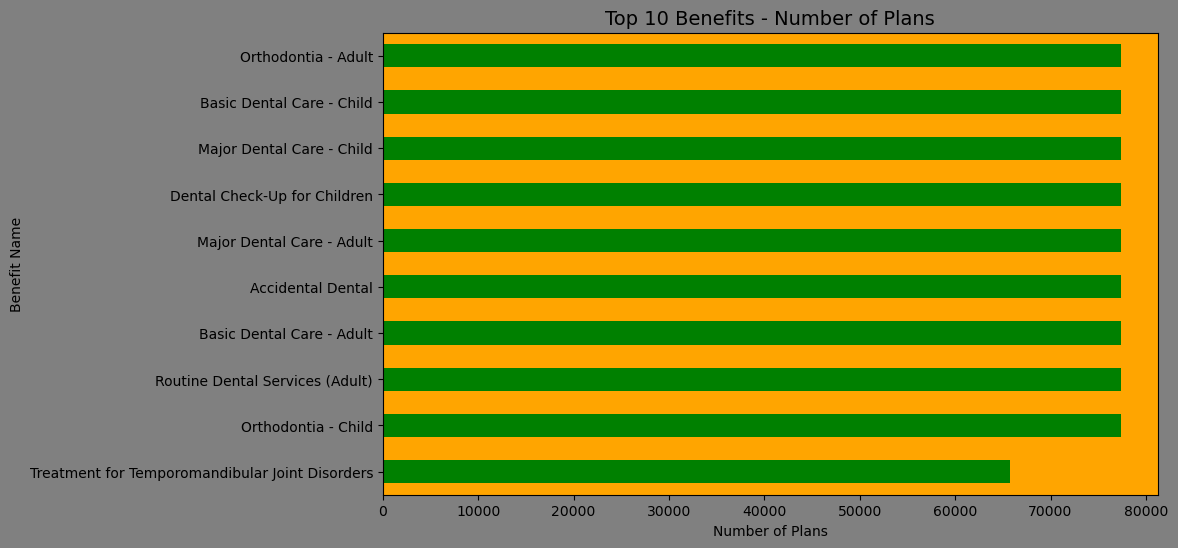

In [213]:
# Top 10 benefits
top_benefits = Benefit_coast['BenefitName'].value_counts().head(10)
# Figure set, background color gray
fig, ax = plt.subplots(figsize=(10,6), facecolor='gray')
# Plot background colorax.set_facecolor('white')
# Horizontal bar chart
top_benefits.sort_values().plot(kind='barh', color='green', ax=ax)
ax.set_facecolor('orange')
# Title and labels
plt.title("Top 10 Benefits - Number of Plans", fontsize=14, color='black')
plt.xlabel("Number of Plans")
plt.ylabel("Benefit Name")
# Show chart
plt.show()

In [29]:
# lets check the iscovered
Benefit_coast['IsCovered'].value_counts(dropna=False)

IsCovered
covered        3934525
not covered     897903
NaN             215980
Name: count, dtype: int64

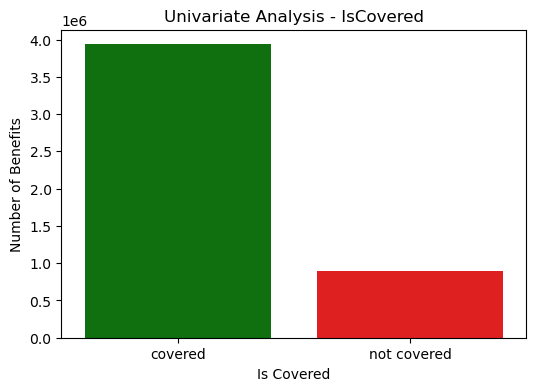

In [107]:
plt.figure(figsize=(6,4))
sns.countplot(data=Benefit_coast, x='IsCovered',hue='IsCovered',palette=['green','red'],legend=False)
plt.title("Univariate Analysis - IsCovered")
plt.xlabel("Is Covered")
plt.ylabel("Number of Benefits")
plt.show()

📊 Bivariate Analysis:analyzing the relationship between two variables.

In [110]:
# lets check relation between BusinessYear vs IsCovered
Years_cover = Benefit_coast.groupby(['BusinessYear','IsCovered']).size()

In [112]:
Years_cover

BusinessYear  IsCovered  
2014          covered         898738
              not covered     203427
2015          covered        1627722
              not covered     374167
2016          covered        1408065
              not covered     320309
dtype: int64

In [157]:
year_covertable = Benefit_coast.groupby(['BusinessYear','IsCovered']).size().unstack()
print(year_cover_table) # for easy understanding

IsCovered                           covered  not covered
BenefitName                                             
 Routine Exams and X-Rays - Child       8.0          NaN
24/7 Doctor Helpline                   24.0          NaN
ABA Autism Spectrum Disorders           4.0          NaN
ABA for Autism Spectrum Disorders     256.0          NaN
ABA for Autism Spectrum Disprders       4.0          NaN
...                                     ...          ...
root Canal Therapy and Retreatment      1.0          NaN
Clinical - Trials                    55.0          NaN
Diabetes - Care Management           55.0          NaN
Mental Health - Other                55.0          NaN
Prescription Drugs - Other            NaN         55.0

[849 rows x 2 columns]


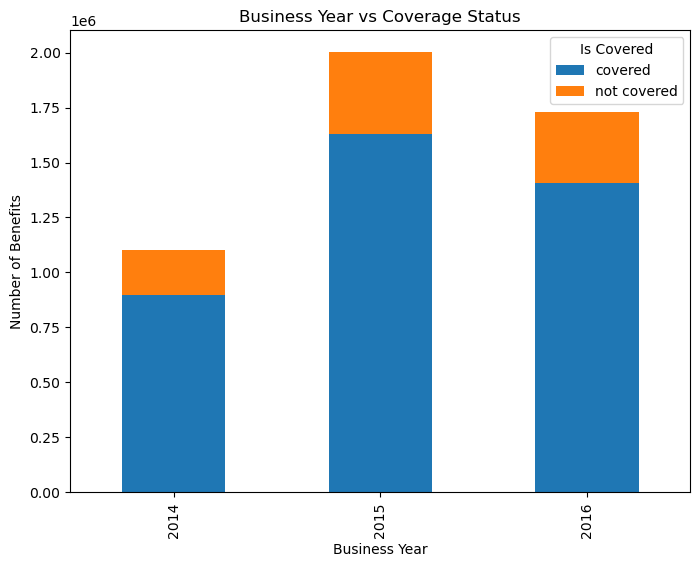

In [159]:
year_covertable.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Business Year vs Coverage Status")
plt.xlabel("Business Year")
plt.ylabel("Number of Benefits")
plt.legend(title="Is Covered")
plt.show()

In [127]:
# Lets check relation between StateCode vs IsCovered
State_cover_table = Benefit_coast.groupby(['StateCode','IsCovered']).size().unstack()
print(State_cover_table) # for easy understanding

IsCovered  covered  not covered
StateCode                      
AK           32214         3996
AL           21594         6286
AR           51683         9957
AZ          179153        24082
DE           25173         4982
FL          276575        75760
GA          150230        36380
HI            5299         1436
IA           84703        21358
ID           19927         6964
IL          269525        49454
IN          113835        29678
KS           48889        14936
LA           74045        17120
ME           45848         9822
MI          146158        39077
MO           73083        17232
MS           35343        11337
MT           44782        10264
NC           78220         8748
ND           37764         9717
NE           49909        12041
NH           34810         6091
NJ           69367        12263
NM           45298        10060
NV           50838         7649
OH          254362        64565
OK          105047        28050
OR           72827        16901
PA      

In [147]:
State_cover_table.sort_values(by='covered', ascending=False)

IsCovered,covered,not covered
StateCode,,
WI,394189,98765
TX,370602,87878
FL,276575,75760
IL,269525,49454
OH,254362,64565
PA,192901,59294
AZ,179153,24082
GA,150230,36380
MI,146158,39077


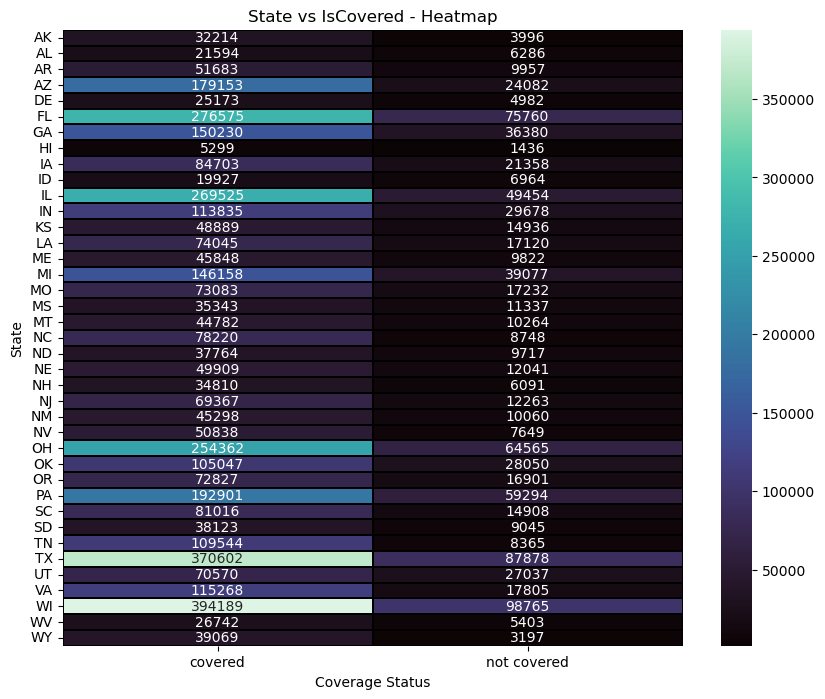

In [203]:
State_cover_table = Benefit_coast.groupby(['StateCode','IsCovered']).size().unstack()
plt.figure(figsize=(10,8))
sns.heatmap(State_cover_table, annot=True, fmt='g',linewidths=0.10,linecolor='black',cmap='mako')
plt.title("State vs IsCovered - Heatmap")
plt.xlabel("Coverage Status")
plt.ylabel("State")
plt.show()

In [217]:
benefit_cover = Benefit_coast.groupby(['BenefitName','IsCovered']).size().unstack()
print(benefit_cover.head(10))

IsCovered                                        covered  not covered
BenefitName                                                          
 Routine Exams and X-Rays - Child                    8.0          NaN
24/7 Doctor Helpline                                24.0          NaN
ABA Autism Spectrum Disorders                        4.0          NaN
ABA for Autism Spectrum Disorders                  256.0          NaN
ABA for Autism Spectrum Disprders                    4.0          NaN
Abortion Services                                    9.0          NaN
Abortion for Which Public Funding is Prohibited   4259.0      49268.0
Accident Benefit                                    22.0          NaN
Accidental Dental                                66225.0       5544.0
Accidental Dental - Adult                           10.0          NaN


In [219]:
Benefit_coast['BenefitName'].nunique()

861

In [223]:
top_benefits = Benefit_coast['BenefitName'].value_counts().head(10).index

In [225]:
top_benefits

Index(['Orthodontia - Adult', 'Routine Dental Services (Adult)',
       'Basic Dental Care - Adult', 'Accidental Dental',
       'Major Dental Care - Adult', 'Dental Check-Up for Children',
       'Major Dental Care - Child', 'Basic Dental Care - Child',
       'Orthodontia - Child',
       'Treatment for Temporomandibular Joint Disorders'],
      dtype='object', name='BenefitName')

In [227]:
filtered_data = Benefit_coast[Benefit_coast['BenefitName'].isin(top_benefits)]

In [229]:
filtered_data

,BusinessYear,StateCode,BenefitName,IsCovered,PlanId,IssuerId
0,2014,AK,Routine Dental Services (Adult),covered,21989AK0010001-00,21989
1,2014,AK,Dental Check-Up for Children,covered,21989AK0010001-00,21989
2,2014,AK,Basic Dental Care - Child,covered,21989AK0010001-00,21989
3,2014,AK,Orthodontia - Child,covered,21989AK0010001-00,21989
4,2014,AK,Major Dental Care - Child,covered,21989AK0010001-00,21989
...,...,...,...,...,...,...
5048403,2016,WV,Major Dental Care - Child,covered,96480WV0110003-00,96480
5048404,2016,WV,Basic Dental Care - Adult,NaN,96480WV0110003-00,96480
5048405,2016,WV,Orthodontia - Adult,NaN,96480WV0110003-00,96480
5048406,2016,WV,Major Dental Care - Adult,NaN,96480WV0110003-00,96480


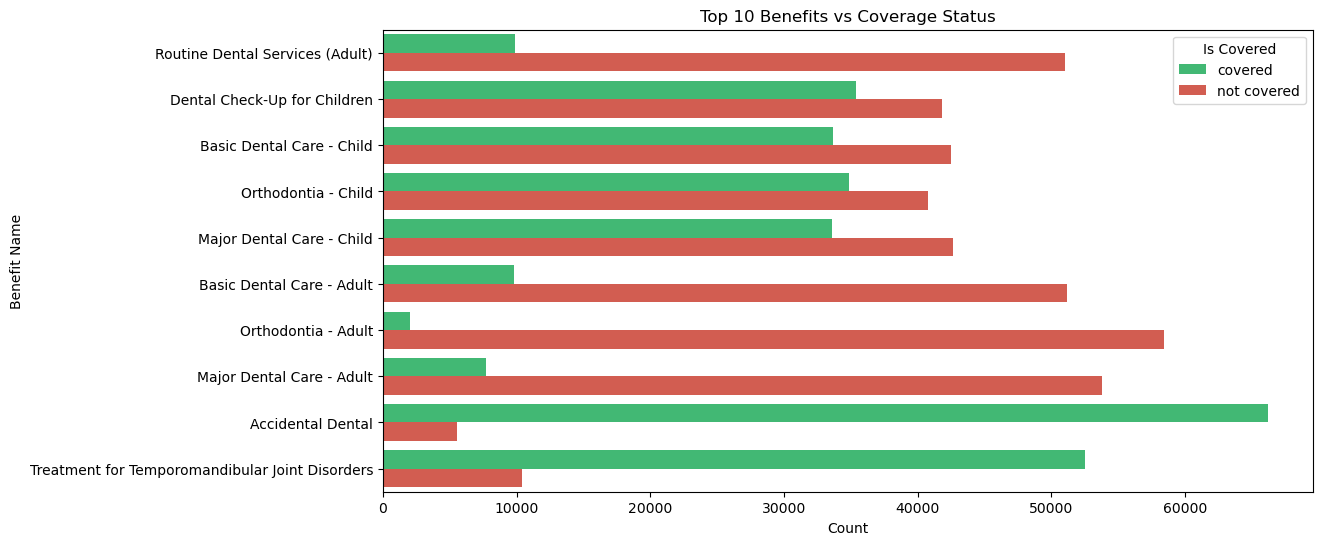

In [237]:
plt.figure(figsize=(12,6)) # count plot
sns.countplot(data=filtered_data,y='BenefitName',hue='IsCovered',palette=['#2ecc71','#e74c3c'])
plt.title("Top 10 Benefits vs Coverage Status")
plt.xlabel("Count")
plt.ylabel("Benefit Name")
plt.legend(title="Is Covered")
plt.show()

📊 Multivarient Analysis:analyzing the relationship between two and more variables.
 * Relation between Buness year,State code,and Iscovered

In [240]:
multi_table1 = Benefit_coast.groupby(['BusinessYear', 'StateCode', 'IsCovered']).size().reset_index(name='Count')

In [244]:
multi_table1.head(10)

,BusinessYear,StateCode,IsCovered,Count
0,2014,AK,covered,10838
1,2014,AK,not covered,1680
2,2014,AL,covered,5819
3,2014,AL,not covered,1630
4,2014,AR,covered,17242
5,2014,AR,not covered,2660
6,2014,AZ,covered,69098
7,2014,AZ,not covered,10147
8,2014,DE,covered,5591
9,2014,DE,not covered,863


In [250]:
# relation between Benefit Name,State Code,Iscovered
multi_table2 = Benefit_coast.groupby(['BenefitName','StateCode','IsCovered']).size().reset_index(name='Count')

In [251]:
multi_table2

,BenefitName,StateCode,IsCovered,Count
0,Routine Exams and X-Rays - Child,OR,covered,8
1,24/7 Doctor Helpline,NJ,covered,24
2,ABA Autism Spectrum Disorders,NV,covered,4
3,ABA for Autism Spectrum Disorders,NV,covered,256
4,ABA for Autism Spectrum Disprders,NV,covered,4
...,...,...,...,...
5193,root Canal Therapy and Retreatment,FL,covered,1
5194,Clinical - Trials,IL,covered,55
5195,Diabetes - Care Management,IL,covered,55
5196,Mental Health - Other,MI,covered,55


In [254]:
pivot_table = multi_table.pivot_table(index=['BenefitName','StateCode'],columns='IsCovered',values='Count',fill_value=0)

In [256]:
pivot_table

,IsCovered,covered,not covered
BenefitName,StateCode,,
Routine Exams and X-Rays - Child,OR,8.0,0.0
24/7 Doctor Helpline,NJ,24.0,0.0
ABA Autism Spectrum Disorders,NV,4.0,0.0
ABA for Autism Spectrum Disorders,NV,256.0,0.0
ABA for Autism Spectrum Disprders,NV,4.0,0.0
...,...,...,...
root Canal Therapy and Retreatment,FL,1.0,0.0
Clinical - Trials,IL,55.0,0.0
Diabetes - Care Management,IL,55.0,0.0


In [258]:
# lets analysis between Business Year,Benefit Name and iscovered
multi_table3 = Benefit_coast.groupby(['BusinessYear', 'BenefitName', 'IsCovered']).size().reset_index(name='Count')

In [264]:
multi_table3.head()

,BusinessYear,BenefitName,IsCovered,Count
0,2014,Abortion for Which Public Funding is Prohibited,covered,827
1,2014,Abortion for Which Public Funding is Prohibited,not covered,10850
2,2014,Accident Benefit,covered,22
3,2014,Accidental Dental,covered,15090
4,2014,Accidental Dental,not covered,1786


In [266]:
pivot_year_benefit = multi_table3.pivot_table(index=['BusinessYear','BenefitName'],columns='IsCovered',values='Count', fill_value=0)

In [268]:
pivot_year_benefit

IsCovered                                                     covered  \
BusinessYear BenefitName                                                
2014         Abortion for Which Public Funding is Prohibited    827.0   
             Accident Benefit                                    22.0   
             Accidental Dental                                15090.0   
             Accidental Dental - Adult                            4.0   
             Accidental Dental - Treatment days 63-365           75.0   
...                                                               ...   
2016         massage therapy                                      4.0   
             Clinical - Trials                                 55.0   
             Diabetes - Care Management                        55.0   
             Mental Health - Other                             55.0   
             Prescription Drugs - Other                         0.0   

IsCovered                                                     not covered  
BusinessYear BenefitName                                                   
2014         Abortion for Which Public Funding is Prohibited      10850.0  
             Accident Benefit                                         0.0  
             Accidental Dental                                     1786.0  
             Accidental Dental - Adult                                0.0  
             Accidental Dental - Treatment days 63-365                0.0  
...                                                                   ...  
2016         massage therapy                                          0.0  
             Clinical - Trials                                      0.0  
             Diabetes - Care Management                             0.0  
             Mental Health - Other                                  0.0  
             Prescription Drugs - Other                            55.0  

[1430 rows x 2 columns]

In [ ]:
🔎 What You Should Analyze:
*

In [291]:
pivot = multi_table3.pivot_table(index=['BusinessYear','BenefitName'],columns='IsCovered',values='Count',fill_value=0)
pivot['Total'] = pivot.sum(axis=1)
pivot['Covered_%'] = (pivot['covered'] / pivot['Total']) * 100

In [293]:
pivot.head(10)

IsCovered                                                        covered  \
BusinessYear BenefitName                                                   
2014         Abortion for Which Public Funding is Prohibited       827.0   
             Accident Benefit                                       22.0   
             Accidental Dental                                   15090.0   
             Accidental Dental - Adult                               4.0   
             Accidental Dental - Treatment days 63-365              75.0   
             Acupuncture                                           827.0   
             Addition of teeth or clasp to existing partial ...     16.0   
             Adoption Indemnity Benefit                             32.0   
             Adult Frames or Lenses                                 36.0   
             Adult Vision Frames or Lenses                         360.0   

IsCovered                                                        not covered  \
BusinessYear BenefitName                                                       
2014         Abortion for Which Public Funding is Prohibited         10850.0   
             Accident Benefit                                            0.0   
             Accidental Dental                                        1786.0   
             Accidental Dental - Adult                                   0.0   
             Accidental Dental - Treatment days 63-365                   0.0   
             Acupuncture                                             11300.0   
             Addition of teeth or clasp to existing partial ...          0.0   
             Adoption Indemnity Benefit                                  0.0   
             Adult Frames or Lenses                                      0.0   
             Adult Vision Frames or Lenses                               0.0   

IsCovered                                                          Total  \
BusinessYear BenefitName                                                   
2014         Abortion for Which Public Funding is Prohibited     11677.0   
             Accident Benefit                                       22.0   
             Accidental Dental                                   16876.0   
             Accidental Dental - Adult                               4.0   
             Accidental Dental - Treatment days 63-365              75.0   
             Acupuncture                                         12127.0   
             Addition of teeth or clasp to existing partial ...     16.0   
             Adoption Indemnity Benefit                             32.0   
             Adult Frames or Lenses                                 36.0   
             Adult Vision Frames or Lenses                         360.0   

IsCovered                                                         Covered_%  
BusinessYear BenefitName                                                     
2014         Abortion for Which Public Funding is Prohibited       7.082299  
             Accident Benefit                                    100.000000  
             Accidental Dental                                    89.416923  
             Accidental Dental - Adult                           100.000000  
             Accidental Dental - Treatment days 63-365           100.000000  
             Acupuncture                                           6.819494  
             Addition of teeth or clasp to existing partial ...  100.000000  
             Adoption Indemnity Benefit                          100.000000  
             Adult Frames or Lenses                              100.000000  
             Adult Vision Frames or Lenses                       100.000000

In [297]:
year_total = pivot.groupby('BusinessYear').agg({'covered':'sum','Total':'sum'})
year_total['Overall_Covered_%'] = (year_total['covered'] / year_total['Total']) * 100

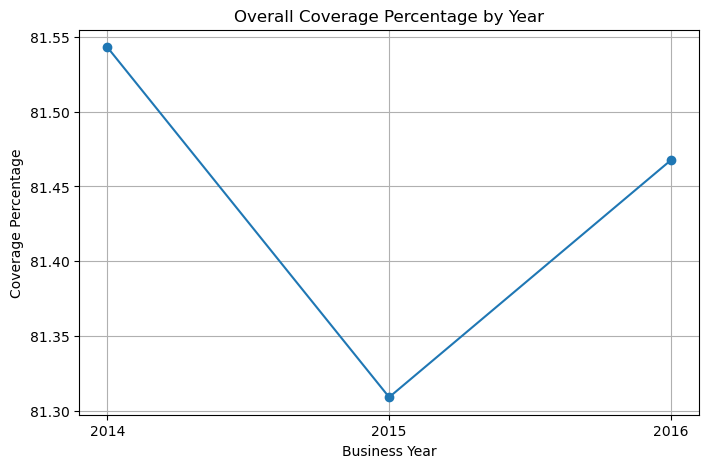

In [299]:
plt.figure(figsize=(8,5))
plt.plot(year_total.index, year_total['Overall_Covered_%'], marker='o')
plt.title("Overall Coverage Percentage by Year")
plt.xlabel("Business Year")
plt.ylabel("Coverage Percentage")
plt.xticks(year_total.index)
plt.grid(True)
plt.show()

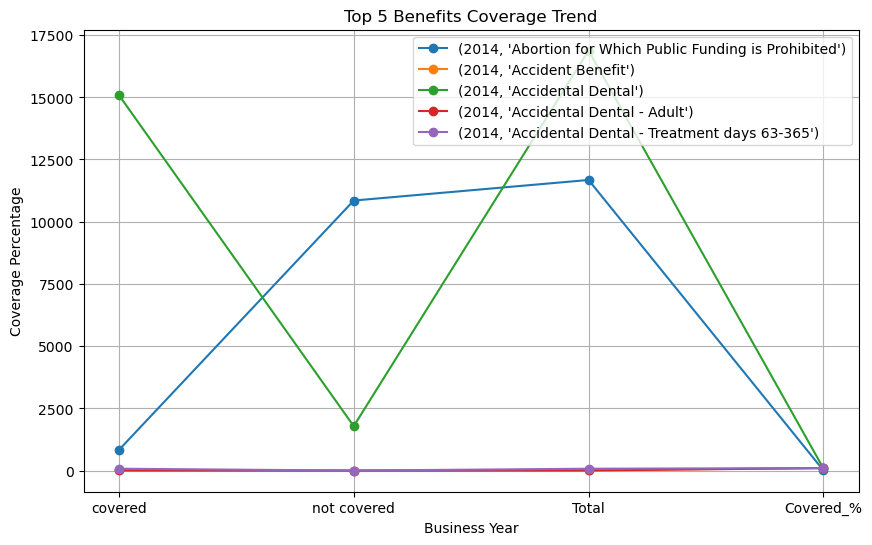

In [307]:
top5 = pivot.head(5)
plt.figure(figsize=(10,6))
for benefit in top5.index:
    plt.plot(top5.columns, top5.loc[benefit], marker='o', label=str(benefit))
plt.title("Top 5 Benefits Coverage Trend")
plt.xlabel("Business Year")
plt.ylabel("Coverage Percentage")
plt.legend()
plt.grid(True)
plt.show()

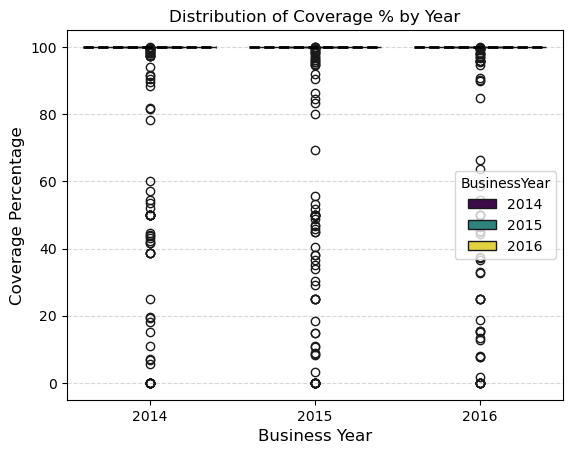

In [327]:
sns.boxplot(data=pivot,x='BusinessYear',hue='BusinessYear',medianprops={'color':'', 'linewidth':2, 'linestyle':'--'},y='Covered_%',palette='viridis')
plt.title("Distribution of Coverage % by Year")
plt.xlabel("Business Year", fontsize=12)
plt.ylabel("Coverage Percentage", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

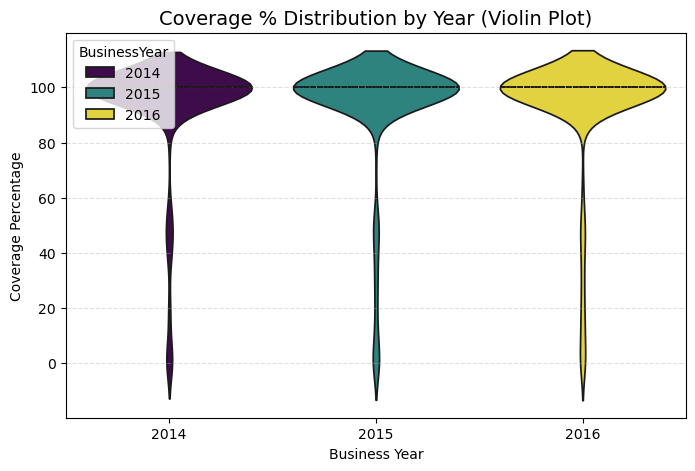

In [333]:
plt.figure(figsize=(8,5))
sns.violinplot(data=pivot,x='BusinessYear',hue='BusinessYear',y='Covered_%',palette='viridis',inner='quartile')
plt.title("Coverage % Distribution by Year (Violin Plot)", fontsize=14)
plt.xlabel("Business Year")
plt.ylabel("Coverage Percentage")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()